# K-means clustering

### Importing libraries

In [203]:
# Numpy
import numpy as np
from numpy import concatenate, array
from numpy.random import randn

# Matplotlib
import matplotlib.pyplot as pyplot
import matplotlib.cm as cm
%matplotlib inline
#mpl.rc('figure', figsize=(10, 8))

# DBscan from sklearn
from sklearn import cluster, datasets
from sklearn.cluster import DBSCAN
from sklearn import metrics
print 'All libraries loaded.'

All libraries loaded.


### Visualizing the dataset

In [204]:
num = 200
multiplier = 15.
d1 = concatenate((randn(1,num),multiplier*randn(1,num)),0)
d2 = concatenate((randn(1,num),multiplier*randn(1,num)),0)+array([[10.],[0.]])
d3 = concatenate((randn(1,num),multiplier*randn(1,num)),0)+array([[0.],[100.]])
d4 = concatenate((randn(1,num),multiplier*randn(1,num)),0)+array([[10.],[100.]])
d5 = concatenate((randn(1,num),multiplier*randn(1,num)),0)+array([[0.],[200.]])
d6 = concatenate((randn(1,num),multiplier*randn(1,num)),0)+array([[10.],[200.]])

dataArray = concatenate((d1,d2,d3,d4,d5,d6),1).T
         
print dataArray.shape

(1200, 2)


In [227]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler



(750, 3)


(900, 3)


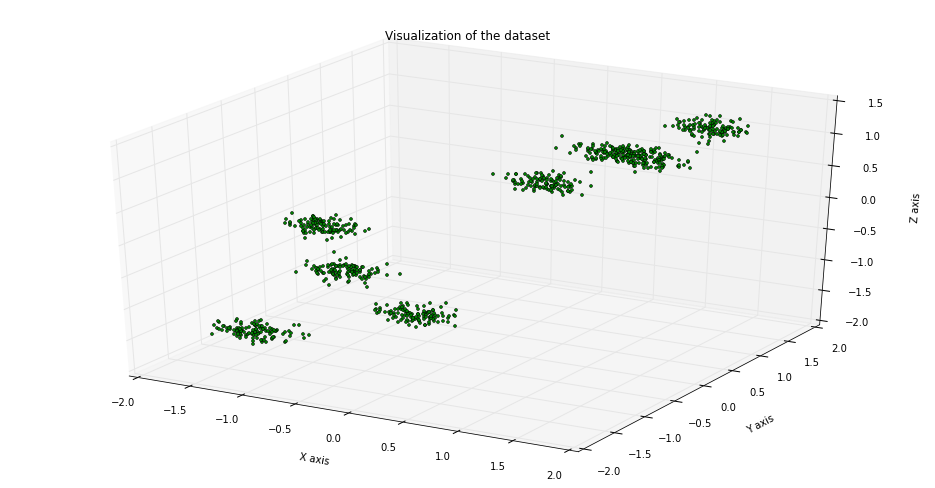

In [260]:
num = 900

centers = [[-2, -8, -6],[0, -4, -6], 
           [-2, -4, 2], [0, -8, 2], 
           [2, 2, 8], [2, -2, 8], 
           [4, 2, 12], [4, -2, 12]
          ]
dataArray, labels_true = make_blobs(n_samples=num, centers=centers, cluster_std=0.4, random_state=0)
dataArray = StandardScaler().fit_transform(dataArray)
print dataArray.shape

# Plot the dataset

# figure,axis = pyplot.subplots(1,1)
# axis.plot(dataArray.T[0], dataArray.T[1], dataArray.T[2], 'o', color='g', markersize=5)
# axis.set_title('Visualization of the dataset')
# pyplot.show()

from mpl_toolkits.mplot3d import Axes3D
fig = pyplot.figure()
fig.set_size_inches(16.5, 8.5)
axis = fig.add_subplot(111, projection='3d')
axis.set_title('Visualization of the dataset')
axis.plot(dataArray.T[0], dataArray.T[1], dataArray.T[2], 'o', color='g', markersize=3)
axis.set_xlabel('X axis')
axis.set_ylabel('Y axis')
axis.set_zlabel('Z axis')

In [272]:
radius=0.3
min_num_of_samples=50

dbscan_inbuilt = DBSCAN(eps=radius, min_samples=min_num_of_samples, metric='euclidean', algorithm='auto').fit(dataArray)
labels = dbscan_inbuilt.labels_

core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan_inbuilt.core_sample_indices_] = True

print dataArray.shape
unique_labels = set(labels)
print unique_labels

# Number of clusters
numOfClusters = len(set(labels)) - (1 if -1 in labels else 0)
print numOfClusters

# distance metric over feature matrix - Euclidean distance
#distance = EuclideanDistance(train_features, train_features)

(900, 3)
set([0, 1, 2, 3, 4, 5, 6, 7, -1])
8


(900, 3)


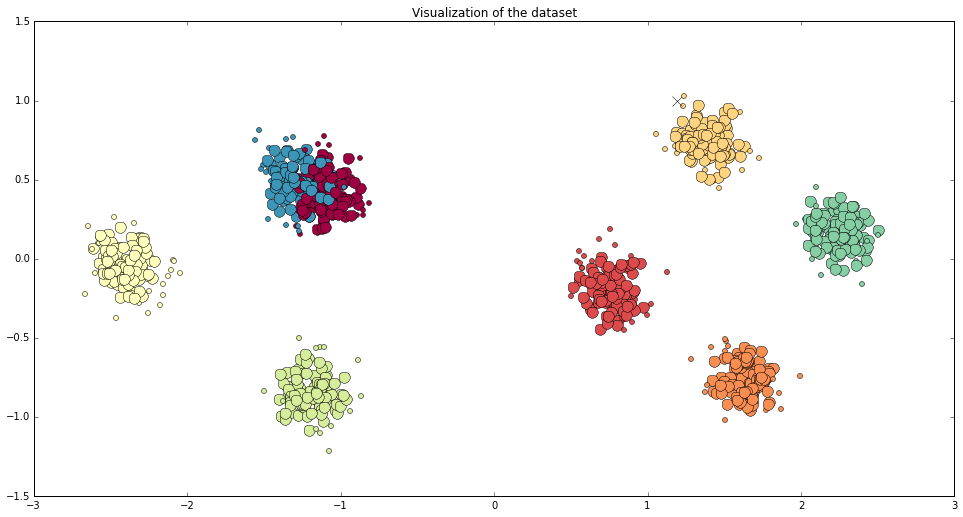

In [280]:
from matplotlib.mlab import PCA
from matplotlib import colors
pca_result = PCA(dataArray)

print pca_result.Y.shape

figure,axis = pyplot.subplots(1,1)
figure.set_size_inches(16.5, 8.5)
clusterColors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for i in range(0, dataArray.shape[0]):
    clusterColor = 'k'
    marker = 'o'
    markerSize = 5
    if labels[i] != -1:
        clusterColor = clusterColors[labels[i]]
    else:
        marker = 'x'
        markerSize = 10
    if core_samples_mask[i]:
        markerSize = 11
    axis.plot(pca_result.Y[i][0], pca_result.Y[i][1], marker, color=clusterColor, markersize=markerSize)
axis.set_title('Visualization of the dataset')
pyplot.show()

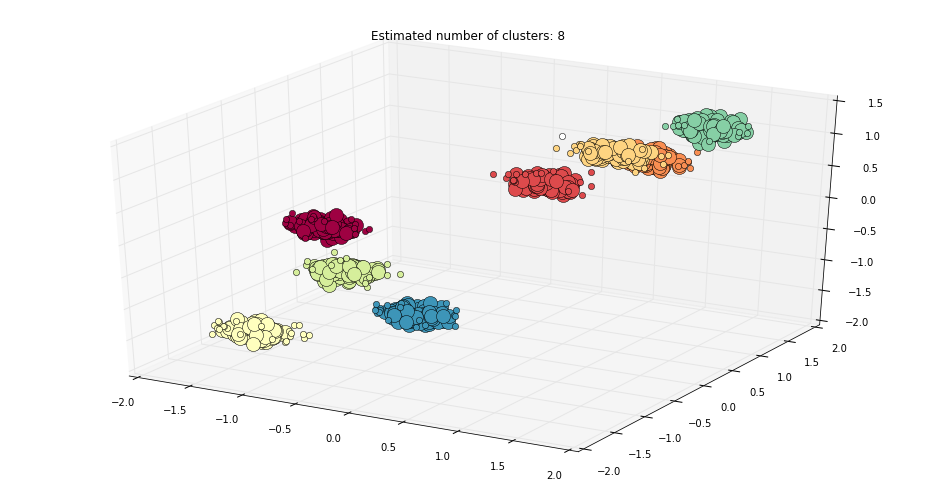

In [267]:
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
core_samples_mask = np.zeros_like(dbscan_inbuilt.labels_, dtype=bool)
core_samples_mask[dbscan_inbuilt.core_sample_indices_] = True

colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

###
from mpl_toolkits.mplot3d import Axes3D
fig = pyplot.figure()
fig.set_size_inches(16.5, 8.5)
axis = fig.add_subplot(111, projection='3d')
# axis.set_title('Visualization of the dataset')
# axis.plot(dataArray.T[0], dataArray.T[1], dataArray.T[2], 'o', color='g', markersize=3)
####

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'w'

    class_member_mask = (labels == k)

    xy = dataArray[class_member_mask & core_samples_mask]
    axis.plot(xy[:, 0], xy[:, 1], xy[:, 2], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)

    xy = dataArray[class_member_mask & ~core_samples_mask]
    axis.plot(xy[:, 0], xy[:, 1], xy[:, 2], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

axis.set_title('Estimated number of clusters: %d' % numOfClusters)
plt.show()